In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
from collections import Counter
import re

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
dataset = pd.read_csv("train_1.csv").fillna(0)
dataset.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [3]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB
None


In [4]:
def get_lang(Page):
    res = re.search('[a-z][a-z].wikipedia.org',Page)
    if res:
        return res[0][0:2]           
    
   
    return 'no_lang'

dataset['lang'] = dataset.Page.map(get_lang)


print("\nArticle count as per Language : \n", Counter(dataset.lang))


Article count as per Language : 
 Counter({'en': 24108, 'ja': 20431, 'de': 18547, 'no_lang': 17855, 'fr': 17802, 'zh': 17229, 'ru': 15022, 'es': 14069})


In [5]:
lang_set={}
lang_set['en'] = dataset[dataset.lang=='en'].iloc[:,0:-1]
lang_set['ja'] = dataset[dataset.lang=='ja'].iloc[:,0:-1]
lang_set['de'] = dataset[dataset.lang=='de'].iloc[:,0:-1]
lang_set['fr'] = dataset[dataset.lang=='fr'].iloc[:,0:-1]
lang_set['zh'] = dataset[dataset.lang=='zh'].iloc[:,0:-1]
lang_set['zh'] = dataset[dataset.lang=='zh'].iloc[:,0:-1]
lang_set['es'] = dataset[dataset.lang=='es'].iloc[:,0:-1]
lang_set['no_lang'] = dataset[dataset.lang=='no_lang'].iloc[:,0:-1]

for key in lang_set:
    print("KEY : ", lang_set[key],"\n")

KEY :                                                       Page  2015-07-01  \
8357            !vote_en.wikipedia.org_desktop_all-agents         3.0   
8358    "Awaken,_My_Love!"_en.wikipedia.org_desktop_al...         0.0   
8359    "European_Society_for_Clinical_Investigation"_...         0.0   
8360    "Weird_Al"_Yankovic_en.wikipedia.org_desktop_a...      2403.0   
8361       100_metres_en.wikipedia.org_desktop_all-agents       982.0   
8362    10_Cloverfield_Lane_en.wikipedia.org_desktop_a...         0.0   
8363    10_Gigabit_Ethernet_en.wikipedia.org_desktop_a...      1078.0   
8364    13_Hours:_The_Secret_Soldiers_of_Benghazi_en.w...         0.0   
8365             1551_en.wikipedia.org_desktop_all-agents        11.0   
8366    1896_Summer_Olympics_en.wikipedia.org_desktop_...       366.0   
8367    1918_flu_pandemic_en.wikipedia.org_desktop_all...       868.0   
8368    1923_San_Pedro_Maritime_Strike_en.wikipedia.or...         1.0   
8369    1936_Summer_Olympics_en.wikipedia.or

In [6]:

total_view = {} 
for key in lang_set:
    total_view[key] = lang_set[key].iloc[:, 1:-1].sum(axis=0) / lang_set[key].shape[0]


for key in lang_set:
    print("KEY : ", key)
    print("\nTotal_Value KEY : \n", total_view[key])

KEY :  en

Total_Value KEY : 
 2015-07-01    3513.862203
2015-07-02    3502.511407
2015-07-03    3325.357889
2015-07-04    3462.054256
2015-07-05    3575.520035
2015-07-06    3849.736021
2015-07-07    3643.523063
2015-07-08    3437.871080
2015-07-09    3517.459391
2015-07-10    3497.571594
2015-07-11    3517.054297
2015-07-12    3869.211216
2015-07-13    3832.417662
2015-07-14    3854.165298
2015-07-15    3563.026589
2015-07-16    3605.074747
2015-07-17    3455.528829
2015-07-18    3335.306288
2015-07-19    3540.557533
2015-07-20    3720.901319
2015-07-21    3544.275386
2015-07-22    3488.537249
2015-07-23    3435.995645
2015-07-24    3340.325991
2015-07-25    3346.974988
2015-07-26    3585.658246
2015-07-27    3643.563216
2015-07-28    3589.972955
2015-07-29    4189.383649
2015-07-30    3283.135930
                 ...     
2016-12-01    4610.895180
2016-12-02    4540.718351
2016-12-03    5119.283350
2016-12-04    5171.994400
2016-12-05    5281.185830
2016-12-06    5239.822217
2016-12

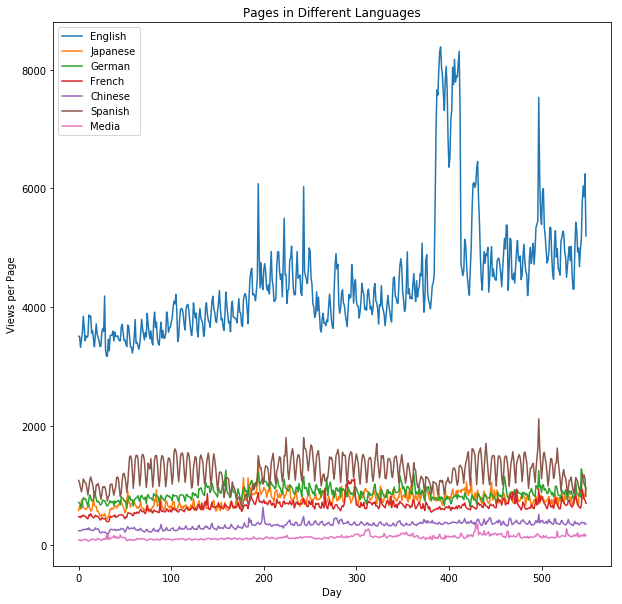

In [7]:

days = [r for r in range(total_view['en'].shape[0])]

fig = plt.figure(1,figsize=[10,10])
plt.ylabel('Views per Page')
plt.xlabel('Day')
plt.title('Pages in Different Languages')
labels={'en':'English','ja':'Japanese','de':'German',
        'no_lang':'Media','fr':'French','zh':'Chinese',
        'ru':'Russian','es':'Spanish'
       }

for key in total_view:
    plt.plot(days,total_view[key],label = labels[key] )
    
plt.legend()
plt.show()

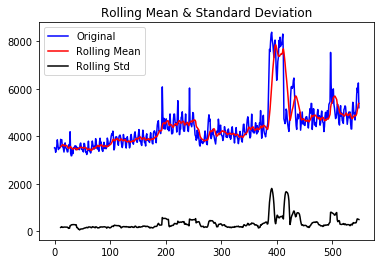

ADF Stastistic: -2.245201
p-value: 0.190251
The graph is non stationery
Critical values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


In [8]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(x):


    #Determing rolling statistics
    rolmean = x.rolling(window=12,center=False).mean()

    rolstd = x.rolling(window=12,center=False).std()
    
    #Plot rolling statistics:
    orig = plt.plot(x.values, color='blue',label='Original')
    mean = plt.plot(rolmean.values, color='red', label='Rolling Mean')
    std = plt.plot(rolstd.values, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey Fuller test    
    result=adfuller(x)
    print('ADF Stastistic: %f'%result[0])
    print('p-value: %f'%result[1])
    pvalue=result[1]
    for key,value in result[4].items():
         if result[0]>value:
            print("The graph is non stationery")
            break
         else:
            print("The graph is stationery")
            break;
    print('Critical values:')
    for key,value in result[4].items():
        print('\t%s: %.3f' % (key, value))
        
test_stationarity(total_view['en'])


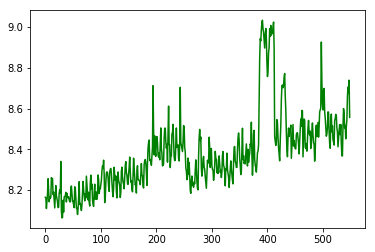

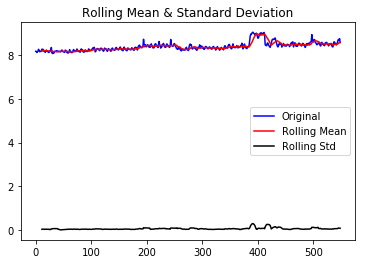

ADF Stastistic: -2.028928
p-value: 0.274035
The graph is non stationery
Critical values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


In [9]:
ts_log = np.log(total_view['en'])
plt.plot(ts_log.values,color="green")
plt.show()

test_stationarity(ts_log)

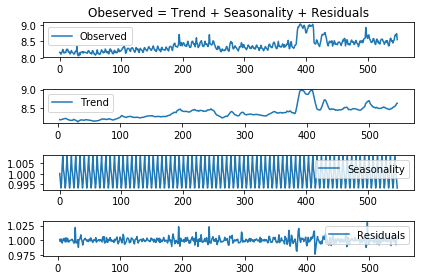

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log.values, model='multiplicative',freq = 7)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


plt.subplot(411)
plt.title('Obeserved = Trend + Seasonality + Residuals')
plt.plot(ts_log.values,label='Observed')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


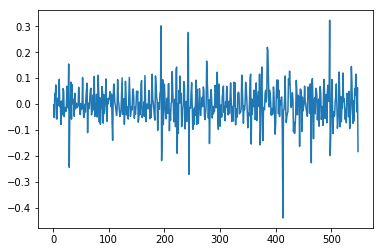

In [11]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff.values)
plt.show()

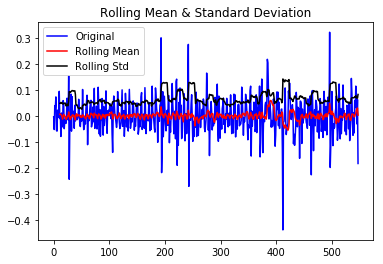

ADF Stastistic: -8.130271
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


In [12]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

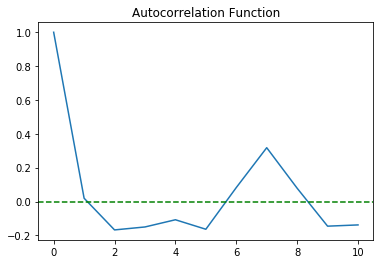

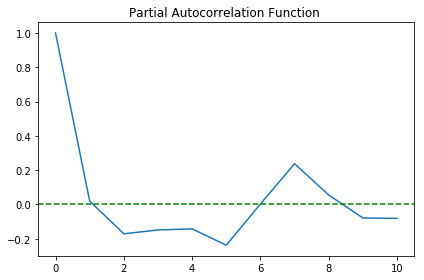

In [13]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

lag_acf = acf(ts_log_diff, nlags=10)
lag_pacf = pacf(ts_log_diff, nlags=10, method='ols')

#Plot ACF: 
plt.subplot(1,1,1)

plt.plot(lag_acf)
#print(lag_acf[0.5])

plt.axhline(y=0,linestyle='--',color='g')
plt.title('Autocorrelation Function')
plt.show()

#Plot PACF:
plt.subplot(1,1,1)
plt.plot(lag_pacf)

plt.axhline(y=0,linestyle='--',color='green')
plt.title('Partial Autocorrelation Function ')
plt.tight_layout()
plt.show()

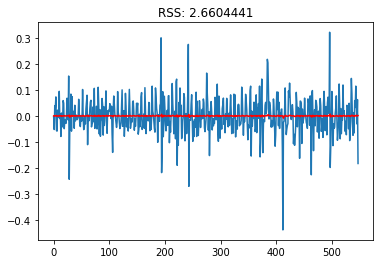

In [14]:
import warnings
warnings.filterwarnings("ignore")


model = ARIMA(ts_log.values, order=(1,1,0))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff.values)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.7f'% sum((results_ARIMA.fittedvalues-ts_log_diff.values)**2))
plt.show()

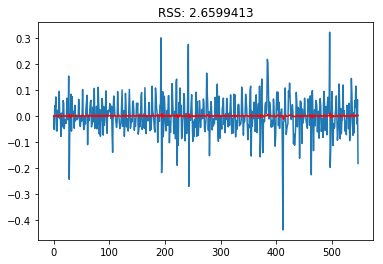

In [15]:
model = ARIMA(ts_log.values, order=(0,1,1))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff.values)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.7f'% sum((results_ARIMA.fittedvalues-ts_log_diff.values)**2))
plt.show()

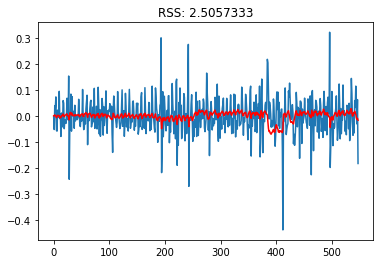

In [16]:
model = ARIMA(ts_log.values, order=(1,1,1))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff.values)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.7f'% sum((results_ARIMA.fittedvalues-ts_log_diff.values)**2))
plt.show()

In [17]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
print(results_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  548
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 698.220
Method:                       css-mle   S.D. of innovations              0.067
Date:                Thu, 28 Mar 2019   AIC                          -1388.440
Time:                        16:46:40   BIC                          -1371.215
Sample:                             1   HQIC                         -1381.708
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.000      5.836      0.000       0.001       0.001
ar.L1.D.y      0.8752      0.021     41.769      0.000       0.834       0.916
ma.L1.D.y     -1.0000      0.005   -182.870      0.0

In [18]:
size = int(len(ts_log)-100)
train_arima, test_arima = ts_log[0:size], ts_log[size:len(ts_log)]
history = [x for x in train_arima]
predictions = list()
originals = list()
error_list = list()

print('Printing Predicted vs Expected Values...')
print('\n')
for t in range(len(test_arima)):
    model = ARIMA(history, order=(1, 1, 1))
    model_fit = model.fit(disp=0)
    
    output = model_fit.forecast()
    
    pred_value = output[0]
    
        
    original_value = test_arima[t]
    history.append(original_value)
    
    pred_value = np.exp(pred_value)
    
    
    original_value = np.exp(original_value)
    
    
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')
    
    predictions.append(float(pred_value))
    originals.append(float(original_value))
    
    #error = mean_squared_error(np.exp(yhat), np.exp(obs))
    #print('mean_squared_error : ', error)
print('\n Means Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')


Printing Predicted vs Expected Values...


predicted = 4711.980506,   expected = 4518.616185,   error = 4.279282  %
predicted = 4598.531960,   expected = 4461.695661,   error = 3.066912  %
predicted = 4545.847259,   expected = 4456.174589,   error = 2.012324  %
predicted = 4540.171989,   expected = 4775.697611,   error = 4.931753  %
predicted = 4830.782710,   expected = 4818.150572,   error = 0.262178  %
predicted = 4869.845843,   expected = 4824.929940,   error = 0.930913  %
predicted = 4876.101129,   expected = 4704.449021,   error = 3.648719  %
predicted = 4766.951795,   expected = 4559.138958,   error = 4.558160  %
predicted = 4634.348490,   expected = 4347.536502,   error = 6.597115  %
predicted = 4439.972160,   expected = 4645.420275,   error = 4.422595  %
predicted = 4711.544963,   expected = 4904.789282,   error = 3.939911  %
predicted = 4947.160324,   expected = 5161.465903,   error = 4.152029  %
predicted = 5178.931971,   expected = 4982.463373,   error = 3.943202  %
predicte

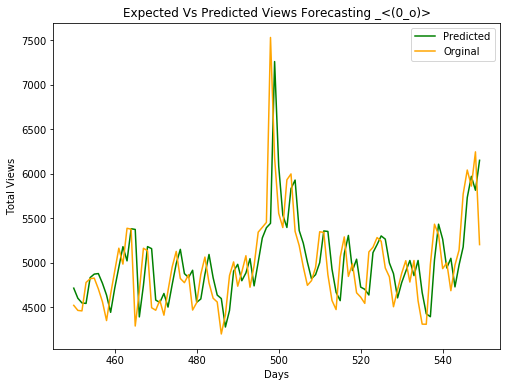

In [19]:
plt.figure(figsize=(8, 6))
test_day = [t+450
           for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plt.plot(test_day, predictions, color= 'green')
plt.plot(test_day, originals, color = 'orange')
plt.title('Expected Vs Predicted Views Forecasting _<(0_o)>')
plt.xlabel('Days')
plt.ylabel('Total Views')
plt.legend(labels)
plt.show()

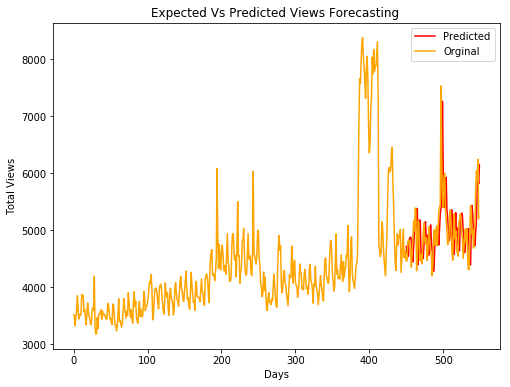

In [37]:
plt.figure(figsize=(8, 6))
test_day = [t+450
           for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plt.plot(test_day, predictions, color= 'red')
plt.plot(days, total_view['en'], color = 'orange')
plt.title('Expected Vs Predicted Views Forecasting ')
plt.xlabel('Days')
plt.ylabel('Total Views')
plt.legend(labels)
plt.show()


In [21]:
npages = 5
top_pages = {}
key = 'en'
print(key)
sum_set = pd.DataFrame(lang_set[key][['Page']])
sum_set['total'] = lang_set[key].sum(axis=1)
sum_set = sum_set.sort_values('total',ascending=False)
print(sum_set.head(5))
top_pages[key] = sum_set.index[0]
print('\n')

en
                                                    Page         total
38573   Main_Page_en.wikipedia.org_all-access_all-agents  1.206618e+10
9774       Main_Page_en.wikipedia.org_desktop_all-agents  8.774497e+09
74114   Main_Page_en.wikipedia.org_mobile-web_all-agents  3.153985e+09
39180  Special:Search_en.wikipedia.org_all-access_all...  1.304079e+09
10403  Special:Search_en.wikipedia.org_desktop_all-ag...  1.011848e+09




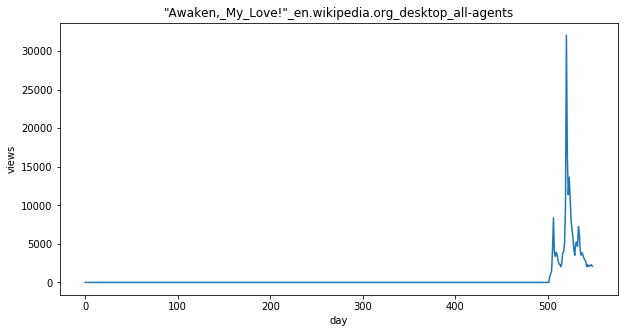

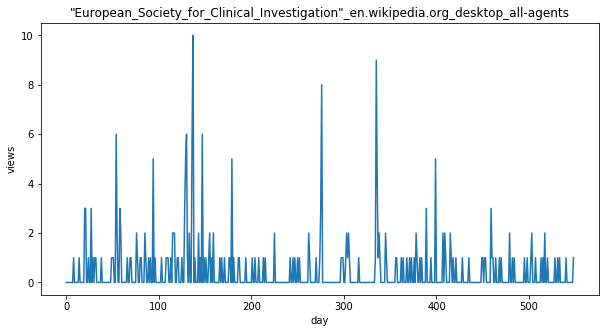

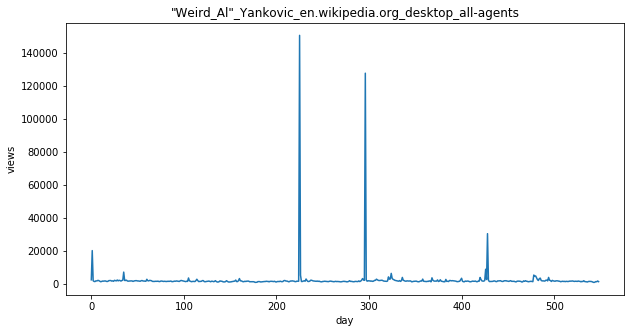

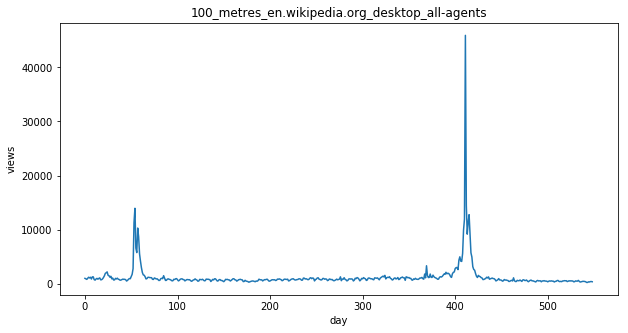

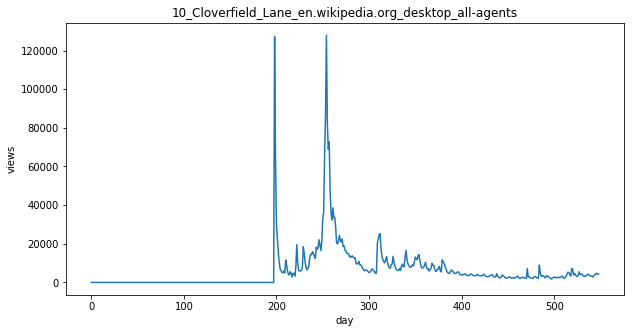

In [22]:
def plot_entry(key,idx):
    data = lang_set[key].iloc[idx,1:-1]
    fig = plt.figure(1,figsize=(10,5))
    plt.plot(days,data)
    plt.xlabel('day')
    plt.ylabel('views')
    plt.title(dataset.iloc[lang_set[key].index[idx],0])
    
    plt.show()
    
idx = [1, 2, 3, 4, 5]
for i in idx:
    plot_entry('en',i)

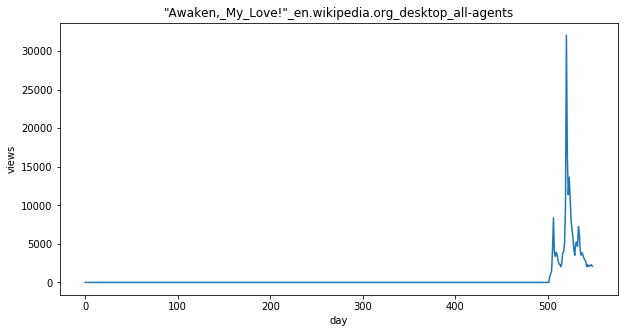

"Awaken,_My_Love!"_en.wikipedia.org_desktop_all-agents
2016-12-26    2074
2016-12-27    2175
2016-12-28    2156
2016-12-29    2302
2016-12-30    2098
Name: 8358, dtype: object


In [23]:
data = lang_set['en'].iloc[1,1:-1]
fig = plt.figure(1,figsize=(10,5))
plt.plot(days,data)
plt.xlabel('day')
plt.ylabel('views')
plt.title(dataset.iloc[lang_set['en'].index[1],0])
plt.show()

print(dataset.iloc[lang_set['en'].index[1],0])
print(data.tail())

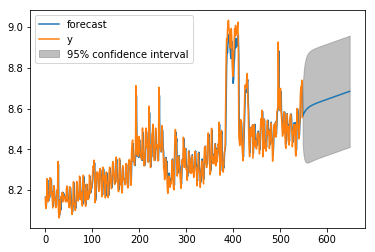

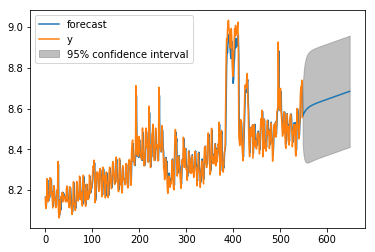

In [40]:

results_ARIMA.plot_predict(1,649)